In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Дамп событий 2019-2022 utf8.csv', sep = ';', low_memory=False)

In [3]:
df.head()

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
0,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,РАСЧКОП,336,28.03.2019,КАН
1,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,ВАКЦИН,349,10.04.2019,КОГЛАВАК
2,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,ВАКЦИН,349,10.04.2019,ЛЕПТО
3,291,530073354,F,6,MA,1,30.07.2009,68,0,23,23,ПЕРЕВОД,448,08.04.2019,F001T023
4,291,530073354,F,6,MA,1,30.07.2009,68,0,23,23,ПРОДАНА,458,18.04.2019,ПРОДАНА ; Прочее ; УВЗ8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592307 entries, 0 to 592306
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Номер животного                      592307 non-null  int64 
 1   Ушная бирка животного                592307 non-null  object
 2   Пол                                  592307 non-null  object
 3   Номер лактации                       592307 non-null  int64 
 4   Результат отела                      331357 non-null  object
 5   Легкость отела                       592307 non-null  int64 
 6   Дата рождения                        592307 non-null  object
 7   Дней в сухостое предыдущей лактации  592307 non-null  int64 
 8   Дней стельности при событии          592307 non-null  int64 
 9   Номер группы животного               592307 non-null  int64 
 10  Предыдущий номер группы животного    592307 non-null  int64 
 11  Событие                   

In [5]:
#преобразуем даты
df['Дата события'] = df['Дата события'].apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))
df['Дата рождения'] = df['Дата рождения'].apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))

In [6]:
#приведем события к единому виду
rename_mapping = {"ABORT":"АБОРТ",
"BRED":"ОСЕМЕН",
"DNB":"НЕОСЕМ",
"DRY":"СУХОСТ",
"FOOTRIM":"РАСЧКОП",
"FRESH":"ОТЕЛ",
"ILLMISC":"БОЛЕЗНЬ",
"KETOS":"КЕТОЗ",
"LAME":"ХРОМОТА",
"MAST":"МАСТИТ",
"METR":"МЕТРИТ",
"MOVE":"ПЕРЕВОД",
"NULSCM":"СО_СХЕМЫ",
"OPEN":"ЯЛОВАЯ",
"POT":"ПРОФОТ",
"RP":"ПОСЛЕД",
"SOLD":"ПРОДАНА",
"TOSCM":"НА_СХЕМУ",
"WEIGHT":"ВЕС",
"WELL":"ЗДОРОВА"}




df['Событие'] = df['Событие'].apply(lambda x: rename_mapping[x] if x in rename_mapping else x)

In [7]:
#выделим протокол лечения
df['protokol'] = df['Примечание события'].apply(lambda x: x.split('_')[0])

In [8]:
#список коров у которых хотя бы раз был статус здорова
recovered_cow = df[df['Событие'] == 'ЗДОРОВА']['Номер животного'].unique()
#recovered_cow
#столбец со статусом хотя бы раз была здорова
df['recovered_cow'] = df['Номер животного'].apply(lambda x: (x in (recovered_cow))*1)

In [9]:
#возраст коровы на мемент события
df['age'] = (df['Дата события'] - df['Дата рождения'])
df['age'] = df['age'].apply(lambda x: x.days)

In [10]:
#уникальные номара коров болевших маститом
cow_with_mastit = df[df['Событие'] == 'МАСТИТ']['Номер животного'].unique()

#отсортированная таблица событий с коровами болевшими маститом
df_cow_with_mastit = df.loc[df['Номер животного'].isin(cow_with_mastit)].sort_values(['Номер животного', 'Дата события'])
df_cow_with_mastit.tail(10)

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age
434891,912272,912272,F,1,FA,1,2019-12-31,0,0,44,43,ПРОФОТ,0,2021-09-30,ПРОФ2,ПРОФ2,1,639
434892,912272,912272,F,1,FA,1,2019-12-31,0,0,0,43,ОТЕЛ,0,2021-09-30,-,-,1,639
435247,912272,912272,F,1,FA,1,2019-12-31,0,0,44,43,ПЕРЕВОД,1,2021-10-01,F044T021,F044T021,1,640
435577,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,МАСТИТ,3,2021-10-03,ТМ6_4,ТМ6,1,642
437667,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,МАСТИТ,10,2021-10-10,ТМ1_1_4,ТМ1,1,649
440102,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,ЗДОРОВА,17,2021-10-17,ГИНЕКОЛ,ГИНЕКОЛ,1,656
440601,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,РАСЧКОП,18,2021-10-18,КАН,КАН,1,657
444127,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,ПЕРЕВОД,20,2021-10-20,F003T043,F003T043,1,659
446780,912272,912272,F,1,FA,1,2019-12-31,0,0,43,43,ПЕРЕВОД,25,2021-10-25,F043T050,F043T050,1,664
447392,912272,912272,F,1,FA,1,2019-12-31,0,0,50,43,ПРОДАНА,26,2021-10-26,ПРОДАНА ; Агалактия ; УВЗ9,ПРОДАНА ; Агалактия ; УВЗ9,1,665


In [11]:
grouped = df_cow_with_mastit.groupby('Номер животного').agg({'recovered_cow':'mean'})['recovered_cow']

print('Процент коров болевших МАСТИТ и имеющих статус ЗДОРОВА:', grouped.sum()/grouped.count()*100)

Процент коров болевших МАСТИТ и имеющих статус ЗДОРОВА: 95.5908926635345


In [12]:
grouped = grouped.reset_index()
grouped

,Номер животного,recovered_cow
0,321,1.0
1,675,0.0
2,784,1.0
3,871,1.0
4,1010,1.0
...,...,...
2762,912227,1.0
2763,912232,1.0
2764,912242,1.0
2765,912253,1.0


In [13]:
un_recovered_cow = grouped[grouped['recovered_cow']<1.0]['Номер животного'].unique()
len(un_recovered_cow)

122

In [14]:
pd.DataFrame(cow_with_mastit, columns = ['id']).to_csv('cow_with_mastit.csv', sep = ';')

In [15]:
print('Процент коров , болевших маститом:', len(cow_with_mastit)/len(df['Номер животного'].unique()))

Процент коров , болевших маститом: 0.1805900013053126


In [16]:
#загрузка файла с родителями
df_parents = pd.read_csv('parents.CSV', encoding = 'cp1251', error_bad_lines = False, header = 0, sep = ';')
df_parents.head(), len(df_parents)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(   Номер животного Ушная бирка животного  Номер Матери    Код Отца Отец Матери
 0                1             570034283             0  -           -         
 1                2             533487712             0  -           -         
 2                3             897733157             0  -           -         
 3                4             584322510             0  -           -         
 4                6             887578050             0  -           -         ,
 25498)

In [17]:
#талица родителей для коров болевших маститом
df_parents_mother = df_parents[df_parents['Номер животного'].isin(cow_with_mastit) & (df_parents['Номер Матери']!=0)]

In [18]:
print('Процент коров болевших маститом, у которых матери тоже болели маститом:', 
      len(df_parents_mother[df_parents_mother['Номер Матери'].isin(cow_with_mastit)])/len(df_parents_mother))

Процент коров болевших маститом, у которых матери тоже болели маститом: 0.33061828952239913


### Гипотеза - предрасположенность к маститу наследственна

Нулевая гипотеза: разницы в вероятности заболеть у коров рожденных коровами болевшими маститом и не болевшими маститом нет.
Альтернативная гипотеза: Вероятность заболеть у коров рожденных от коров болевших маститом больше.

In [19]:
#таблица коров у которых матери болели маститом
df_mather_with_mastit = df_parents[df_parents['Номер Матери'].isin(cow_with_mastit) & (df_parents['Номер Матери']!=0)]

In [20]:
print('Процент коров болевших маститом, при условии, что мать болела маститом:', 
      len(df_mather_with_mastit[df_mather_with_mastit['Номер животного'].isin(cow_with_mastit)])/len(df_mather_with_mastit))

Процент коров болевших маститом, при условии, что мать болела маститом: 0.12296887909666758


In [21]:
#таблица коров у которых матери не болели маститом
df_mather_without_mastit = df_parents[~df_parents['Номер Матери'].isin(cow_with_mastit) & (df_parents['Номер Матери']!=0)]

In [22]:
print('Процент коров болевших маститом, при условии, что мать не болела маститом:', 
      len(df_mather_without_mastit[df_mather_without_mastit['Номер животного'].isin(cow_with_mastit)])/len(df_mather_without_mastit))

Процент коров болевших маститом, при условии, что мать не болела маститом: 0.11683360258481422


In [23]:
import numpy as np
from scipy.stats import ttest_ind, fisher_exact

import warnings
warnings.filterwarnings('ignore')


df_mather_with_mastit['Болен'] = df_mather_with_mastit['Номер животного'] \
                                    .isin(cow_with_mastit).astype(np.int16)

df_mather_without_mastit['Болен'] = df_mather_without_mastit['Номер животного'] \
                                    .isin(cow_with_mastit).astype(np.int16)

dist_mastit = df_mather_with_mastit.Болен
dist_without_mastit = df_mather_without_mastit.Болен

print(f'P-value:\t{ttest_ind(dist_mastit, dist_without_mastit).pvalue}')

P-value:	0.18250075131577576


### Вывод

Процент коров болеющих маститом при условии что мать болела маститом сопоставим с процентом коров болеющих маститом при условии что мать не болела маститом. P-value:	0.18250075131577576, гипотезу о том что если мать болела маститом, то дочь имеет большую вероятность хаболеть маститом можно отвергнуть.

Группировки

In [24]:
df

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age
0,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,РАСЧКОП,336,2019-03-28,КАН,КАН,1,3286
1,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,КОГЛАВАК,КОГЛАВАК,1,3299
2,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,ЛЕПТО,ЛЕПТО,1,3299
3,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПЕРЕВОД,448,2019-04-08,F001T023,F001T023,0,3539
4,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПРОДАНА,458,2019-04-18,ПРОДАНА ; Прочее ; УВЗ8,ПРОДАНА ; Прочее ; УВЗ8,0,3549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592302,912269,912269,F,1,FA,1,2019-12-31,0,239,5,7,РАСЧКОП,274,2022-08-20,КАН,КАН,1,963
592303,912269,912269,F,1,FA,1,2019-12-31,0,239,5,7,ПЕРЕВОД,274,2022-08-20,F005T007,F005T007,1,963
592304,912269,912269,F,1,FA,1,2019-12-31,0,239,7,7,СУХОСТ,279,2022-08-25,-,-,1,968
592305,912270,912270,F,1,MA,1,2019-12-31,0,273,17,17,ВАКЦИН,313,2022-08-23,СКОУ,СКОУ,1,966


In [25]:
df['Месяц события'] = df['Дата события'].apply(lambda x: datetime(x.year, x.month, 1))

In [26]:
df_uniq = df.drop_duplicates(['Номер животного', 'Месяц события']).copy()
uniq_count = df_uniq.groupby('Месяц события').agg({'Номер животного':'count'}).reset_index() #число уникальных событий по месяцам
uniq_count

,Месяц события,Номер животного
0,2019-03-01,4330
1,2019-04-01,5056
2,2019-05-01,5137
3,2019-06-01,3610
4,2019-07-01,4809
5,2019-08-01,4753
6,2019-09-01,4900
7,2019-10-01,4136
8,2019-11-01,5392
9,2019-12-01,4739


In [27]:
mastit_count = df[df['Событие'] == 'МАСТИТ'].groupby('Месяц события').agg({'Номер животного':'count'}).reset_index()
mastit_count['Номер животного'].values

array([288, 170, 191, 226, 224, 264, 226, 202, 237, 277, 340, 335, 300,
       227, 188, 214, 200, 210, 214, 214, 186, 167, 168, 155, 232, 161,
       197, 197, 236, 254, 234, 179, 156,  96, 155, 128, 126,  84,  79,
       132, 126, 127,  46], dtype=int64)

Рассмотрим коров которых не удалось вылечить

In [28]:
df[df['Номер животного'].isin(list(grouped[grouped['recovered_cow']<1.0]['Номер животного']))].sort_values(['Номер животного', 'Дата события'])['Номер животного'].unique()

array([   675,   1283,   4258,   5023,   5094,   6219,   7061,   7162,
         7181,   8001,   8044,   8144,   8191,   8234,   9004,   9066,
         9127,   9180,   9201,  10074,  10152,  10211,  10215,  11096,
        11131,  11167, 202053, 208056, 210265, 212022, 304051, 308124,
       309037, 311065, 311068, 311103, 312039, 312163, 400171, 401023,
       402056, 402083, 402141, 402178, 402180, 403027, 403076, 403180,
       404030, 404073, 405025, 405078, 405087, 407100, 408014, 408019,
       408051, 408112, 409060, 410024, 410118, 412079, 501037, 501116,
       501128, 503019, 503083, 503123, 503159, 504082, 504084, 507093,
       508041, 509125, 510016, 512024, 603016, 603075, 603132, 604101,
       604152, 605103, 607057, 608060, 608098, 608109, 609063, 611034,
       611081, 701158, 702049, 702674, 703056, 706031, 706154, 707058,
       708147, 708197, 711134, 712092, 801076, 802043, 805097, 805112,
       805130, 808022, 808075, 809154, 811109, 812116, 902013, 902209,
      

In [29]:
unrecovered_cow = df[df['Номер животного'].isin(list(grouped[grouped['recovered_cow']<1.0]['Номер животного']))].sort_values(['Номер животного', 'Дата события'])

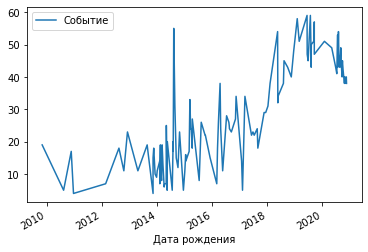

In [30]:
unrecovered_cow.groupby('Номер животного').agg({'Событие':'count', 'Дата рождения':'max'}).sort_values('Дата рождения').plot(y = 'Событие', x = 'Дата рождения')
plt.show()

In [31]:
#уникальные номара коров болевших маститом
cow_with_mastit = df[df['Событие'] == 'МАСТИТ']['Номер животного'].unique()

#отсортированная таблица событий с коровами болевшими маститом
df_cow_with_mastit = df.loc[df['Номер животного'].isin(cow_with_mastit)].sort_values(['Номер животного', 'Дата события'])
df_cow_with_mastit.tail(10)

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age,Месяц события
434891,912272,912272,F,1,FA,1,2019-12-31,0,0,44,43,ПРОФОТ,0,2021-09-30,ПРОФ2,ПРОФ2,1,639,2021-09-01
434892,912272,912272,F,1,FA,1,2019-12-31,0,0,0,43,ОТЕЛ,0,2021-09-30,-,-,1,639,2021-09-01
435247,912272,912272,F,1,FA,1,2019-12-31,0,0,44,43,ПЕРЕВОД,1,2021-10-01,F044T021,F044T021,1,640,2021-10-01
435577,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,МАСТИТ,3,2021-10-03,ТМ6_4,ТМ6,1,642,2021-10-01
437667,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,МАСТИТ,10,2021-10-10,ТМ1_1_4,ТМ1,1,649,2021-10-01
440102,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,ЗДОРОВА,17,2021-10-17,ГИНЕКОЛ,ГИНЕКОЛ,1,656,2021-10-01
440601,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,РАСЧКОП,18,2021-10-18,КАН,КАН,1,657,2021-10-01
444127,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,ПЕРЕВОД,20,2021-10-20,F003T043,F003T043,1,659,2021-10-01
446780,912272,912272,F,1,FA,1,2019-12-31,0,0,43,43,ПЕРЕВОД,25,2021-10-25,F043T050,F043T050,1,664,2021-10-01
447392,912272,912272,F,1,FA,1,2019-12-31,0,0,50,43,ПРОДАНА,26,2021-10-26,ПРОДАНА ; Агалактия ; УВЗ9,ПРОДАНА ; Агалактия ; УВЗ9,1,665,2021-10-01


In [32]:
def part_return(row):
    if row['Событие']!='МАСТИТ':
        return '0 0 0 0'
    else:
        if row['Примечание события'] == 'МВ':
            return '0 0 0 0'
        else:
            tmp = str(row['Примечание события'].split('_')[1:])
            if (tmp == "['3', '4']") | (tmp == "['34']") | (tmp == "['3,4']"):
                return '0 0 1 1'
            elif (tmp == "['134']") :
                return '1 0 1 1'
            elif (tmp == "['2']") :
                return '0 1 0 0'
            elif (tmp == "['24']") | (tmp == "['?24']") | (tmp == "['2,4']"):
                return '0 1 0 1'
            if (tmp == "['1', '4']") | (tmp == "['?']") | (tmp == "['1-4']") | (tmp == "['T']"):
                return '1 1 1 1'
            elif (tmp == "['1']") :
                return '1 0 0 0'
            if (tmp == "['14']") | (tmp == "['1,4']") | (tmp == "['1,4,']"):
                return '1 0 0 1'
            elif (tmp == "['3']") | (tmp == "[',3']"):
                return '0 0 1 0'
            elif (tmp == "['4']") | (tmp == "['?4']") | (tmp == "['4,']"):
                return '0 0 0 1'
            elif (tmp == "['23']") | (tmp == "['2,3']") | (tmp == "['?23']"):
                return '0 1 1 0'
            elif (tmp == "['12']") | (tmp == "['1,2']") :
                return '1 1 0 0'
            elif (tmp == "['2-4']") | (tmp == "['234']") :
                return '0 1 1 1'
            elif (tmp == "['124']") :
                return '1 1 0 1'
            elif (tmp == "['123']") | (tmp == "['1-3']") :
                return '1 1 1 0'
            elif (tmp == "['13']") | (tmp == "['1,3']") :
                return '1 0 1 0'
            elif (tmp == "['']") | (tmp == '[]') | (tmp == "['6']") :
                return '0 0 0 0'
            elif (tmp == "['43']") :
                return '0 0 1 1'
            else:
                return tmp

In [33]:
df_cow_with_mastit['part_1'] = df_cow_with_mastit.apply(part_return, axis = 1)

In [34]:
df_cow_with_mastit

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age,Месяц события,part_1
5,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,МВ,1,3472,2019-03-01,0 0 0 0
6,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,ТМ6,1,3474,2019-03-01,0 0 1 1
7,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,F006T003,1,3475,2019-03-01,0 0 0 0
8,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,КМ4,1,3480,2019-03-01,1 0 1 1
9,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,МАСТИТ,1,3489,2019-04-01,0 0 0 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440102,912272,912272,F,1,FA,1,2019-12-31,0,0,21,43,ЗДОРОВА,17,2021-10-17,ГИНЕКОЛ,ГИНЕКОЛ,1,656,2021-10-01,0 0 0 0
440601,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,РАСЧКОП,18,2021-10-18,КАН,КАН,1,657,2021-10-01,0 0 0 0
444127,912272,912272,F,1,FA,1,2019-12-31,0,0,3,43,ПЕРЕВОД,20,2021-10-20,F003T043,F003T043,1,659,2021-10-01,0 0 0 0
446780,912272,912272,F,1,FA,1,2019-12-31,0,0,43,43,ПЕРЕВОД,25,2021-10-25,F043T050,F043T050,1,664,2021-10-01,0 0 0 0


In [35]:
df_cow_with_mastit = pd.concat([df_cow_with_mastit, pd.DataFrame(df_cow_with_mastit['part_1'].str.split().tolist(), columns = ['p1', 'p2', 'p3', 'p4'], index = df_cow_with_mastit.index)], axis = 1, join='outer')

In [36]:
df_cow_with_mastit = df_cow_with_mastit.drop(['part_1'], axis = 1)

In [37]:
df_cow_with_mastit = df_cow_with_mastit.drop(['Номер группы животного', 'Предыдущий номер группы животного'], axis = 1)

In [38]:
df_cow_with_mastit['p1'] = df_cow_with_mastit['p1'].astype(int)
df_cow_with_mastit['p2'] = df_cow_with_mastit['p2'].astype(int)
df_cow_with_mastit['p3'] = df_cow_with_mastit['p3'].astype(int)
df_cow_with_mastit['p4'] = df_cow_with_mastit['p4'].astype(int)
df_cow_with_mastit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225621 entries, 5 to 447392
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Номер животного                      225621 non-null  int64         
 1   Ушная бирка животного                225621 non-null  object        
 2   Пол                                  225621 non-null  object        
 3   Номер лактации                       225621 non-null  int64         
 4   Результат отела                      176312 non-null  object        
 5   Легкость отела                       225621 non-null  int64         
 6   Дата рождения                        225621 non-null  datetime64[ns]
 7   Дней в сухостое предыдущей лактации  225621 non-null  int64         
 8   Дней стельности при событии          225621 non-null  int64         
 9   Событие                              225621 non-null  object        
 

In [39]:
def struck(row):
    return (row['p1']+row['p2']+row['p3']+row['p4'])

df_cow_with_mastit['struck'] = df_cow_with_mastit.apply(struck, axis = 1)
df_cow_with_mastit

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age,Месяц события,p1,p2,p3,p4,struck
5,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,213,2019-03-15,МВ,МВ,1,3472,2019-03-01,0,0,0,0,0
6,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,215,2019-03-17,ТМ6_34,ТМ6,1,3474,2019-03-01,0,0,1,1,2
7,321,896820302,F,6,FA,3,2009-09-11,62,291,ПЕРЕВОД,216,2019-03-18,F006T003,F006T003,1,3475,2019-03-01,0,0,0,0,0
8,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,221,2019-03-23,КМ4_134,КМ4,1,3480,2019-03-01,1,0,1,1,3
9,321,896820302,F,6,FA,3,2009-09-11,62,291,ЗДОРОВА,230,2019-04-01,МАСТИТ,МАСТИТ,1,3489,2019-04-01,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440102,912272,912272,F,1,FA,1,2019-12-31,0,0,ЗДОРОВА,17,2021-10-17,ГИНЕКОЛ,ГИНЕКОЛ,1,656,2021-10-01,0,0,0,0,0
440601,912272,912272,F,1,FA,1,2019-12-31,0,0,РАСЧКОП,18,2021-10-18,КАН,КАН,1,657,2021-10-01,0,0,0,0,0
444127,912272,912272,F,1,FA,1,2019-12-31,0,0,ПЕРЕВОД,20,2021-10-20,F003T043,F003T043,1,659,2021-10-01,0,0,0,0,0
446780,912272,912272,F,1,FA,1,2019-12-31,0,0,ПЕРЕВОД,25,2021-10-25,F043T050,F043T050,1,664,2021-10-01,0,0,0,0,0


In [40]:
df_cow_with_mastit = df_cow_with_mastit.reset_index()

In [41]:
df_cow_with_mastit['result'] = 0
for i in range(len(df_cow_with_mastit)):
    if df_cow_with_mastit.loc[i, 'Событие'] == 'МАСТИТ':
        if (df_cow_with_mastit.loc[i+1, 'Событие'] == 'ЗДОРОВА') & (df_cow_with_mastit.loc[i+1, 'Примечание события'] == 'МАСТИТ'):
            df_cow_with_mastit.loc[i, 'result'] = 0 #df_cow_with_mastit.loc[i, 'struck']
        elif df_cow_with_mastit.loc[i+1, 'Событие'] == 'МАСТИТ':
            df_cow_with_mastit.loc[i, 'result'] = df_cow_with_mastit.loc[i+1, 'struck']
        elif (df_cow_with_mastit.loc[i+1, 'Событие'] == 'АБОРТ') | (df_cow_with_mastit.loc[i+1, 'Событие'] == 'ГИНЕКОЛ'):
                df_cow_with_mastit.loc[i, 'result'] = df_cow_with_mastit.loc[i, 'struck']
        elif df_cow_with_mastit.loc[i+1, 'Событие'] == 'ПЕРЕВОД':
            if df_cow_with_mastit.loc[i+2, 'Событие'] == 'МАСТИТ':
                df_cow_with_mastit.loc[i, 'result'] = df_cow_with_mastit.loc[i+2, 'struck']
            if (df_cow_with_mastit.loc[i+2, 'Событие'] == 'АБОРТ') | (df_cow_with_mastit.loc[i+2, 'Событие'] == 'ГИНЕКОЛ'):
                df_cow_with_mastit.loc[i, 'result'] = df_cow_with_mastit.loc[i, 'struck']
        else:
            df_cow_with_mastit.loc[i, 'result'] = df_cow_with_mastit.loc[i, 'struck']

In [42]:
df_cow_with_mastit[df_cow_with_mastit['Событие'] == 'МАСТИТ']

,index,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Событие,Дни доения при событии,Дата события,Примечание события,protokol,recovered_cow,age,Месяц события,p1,p2,p3,p4,struck,result
0,5,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,213,2019-03-15,МВ,МВ,1,3472,2019-03-01,0,0,0,0,0,2
1,6,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,215,2019-03-17,ТМ6_34,ТМ6,1,3474,2019-03-01,0,0,1,1,2,3
3,8,321,896820302,F,6,FA,3,2009-09-11,62,291,МАСТИТ,221,2019-03-23,КМ4_134,КМ4,1,3480,2019-03-01,1,0,1,1,3,0
43,44605,675,531779097,F,7,FD,1,2009-11-02,60,0,МАСТИТ,294,2019-07-14,КМ5_2,КМ5,0,3541,2019-07-01,0,1,0,0,1,0
46,44608,675,531779097,F,7,FD,1,2009-11-02,60,0,МАСТИТ,302,2019-07-22,КМ4_2,КМ4,0,3549,2019-07-01,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225397,505548,912232,912232,F,1,MD,3,2019-12-27,0,0,МАСТИТ,80,2022-03-04,КМ1_3,КМ1,1,798,2022-03-01,0,0,1,0,1,1
225473,502335,912242,912242,F,1,FA,1,2019-12-29,0,104,МАСТИТ,118,2022-02-24,КМ1_4,КМ1,1,788,2022-02-01,0,0,0,1,1,0
225562,574002,912253,912253,F,1,FA,1,2019-12-30,0,264,МАСТИТ,277,2022-07-27,КМ1_1,КМ1,1,940,2022-07-01,1,0,0,0,1,0
225614,435577,912272,912272,F,1,FA,1,2019-12-31,0,0,МАСТИТ,3,2021-10-03,ТМ6_4,ТМ6,1,642,2021-10-01,0,0,0,1,1,4


In [43]:
df_cow_with_mastit = df_cow_with_mastit.drop(['Месяц события', 'Дата события', 'index', 'Ушная бирка животного'], axis = 1)
df_cow_with_mastit

,Номер животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Событие,Дни доения при событии,Примечание события,protokol,recovered_cow,age,p1,p2,p3,p4,struck,result
0,321,F,6,FA,3,2009-09-11,62,291,МАСТИТ,213,МВ,МВ,1,3472,0,0,0,0,0,2
1,321,F,6,FA,3,2009-09-11,62,291,МАСТИТ,215,ТМ6_34,ТМ6,1,3474,0,0,1,1,2,3
2,321,F,6,FA,3,2009-09-11,62,291,ПЕРЕВОД,216,F006T003,F006T003,1,3475,0,0,0,0,0,0
3,321,F,6,FA,3,2009-09-11,62,291,МАСТИТ,221,КМ4_134,КМ4,1,3480,1,0,1,1,3,0
4,321,F,6,FA,3,2009-09-11,62,291,ЗДОРОВА,230,МАСТИТ,МАСТИТ,1,3489,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225616,912272,F,1,FA,1,2019-12-31,0,0,ЗДОРОВА,17,ГИНЕКОЛ,ГИНЕКОЛ,1,656,0,0,0,0,0,0
225617,912272,F,1,FA,1,2019-12-31,0,0,РАСЧКОП,18,КАН,КАН,1,657,0,0,0,0,0,0
225618,912272,F,1,FA,1,2019-12-31,0,0,ПЕРЕВОД,20,F003T043,F003T043,1,659,0,0,0,0,0,0
225619,912272,F,1,FA,1,2019-12-31,0,0,ПЕРЕВОД,25,F043T050,F043T050,1,664,0,0,0,0,0,0


In [44]:
df_cow_model = df_cow_with_mastit[df_cow_with_mastit['Событие'] == 'МАСТИТ'].copy()

In [45]:
df_cow_model = df_cow_model.drop(['Пол', 'Дата рождения', 'Событие', 'Примечание события', 'recovered_cow'], axis = 1)
df_cow_model

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дней в сухостое предыдущей лактации,Дней стельности при событии,Дни доения при событии,protokol,age,p1,p2,p3,p4,struck,result
0,321,6,FA,3,62,291,213,МВ,3472,0,0,0,0,0,2
1,321,6,FA,3,62,291,215,ТМ6,3474,0,0,1,1,2,3
3,321,6,FA,3,62,291,221,КМ4,3480,1,0,1,1,3,0
43,675,7,FD,1,60,0,294,КМ5,3541,0,1,0,0,1,0
46,675,7,FD,1,60,0,302,КМ4,3549,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225397,912232,1,MD,3,0,0,80,КМ1,798,0,0,1,0,1,1
225473,912242,1,FA,1,0,104,118,КМ1,788,0,0,0,1,1,0
225562,912253,1,FA,1,0,264,277,КМ1,940,1,0,0,0,1,0
225614,912272,1,FA,1,0,0,3,ТМ6,642,0,0,0,1,1,4


In [46]:
df_cow_model = df_cow_model.reset_index(drop = True)

In [47]:
df_cow_model['stage'] = 0
for i in range(1, len(df_cow_model)):
    if df_cow_model.loc[i-1, 'Номер животного'] == df_cow_model.loc[i, 'Номер животного']:
        df_cow_model.loc[i, 'stage'] = df_cow_model.loc[i-1, 'stage']+1
df_cow_model

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дней в сухостое предыдущей лактации,Дней стельности при событии,Дни доения при событии,protokol,age,p1,p2,p3,p4,struck,result,stage
0,321,6,FA,3,62,291,213,МВ,3472,0,0,0,0,0,2,0
1,321,6,FA,3,62,291,215,ТМ6,3474,0,0,1,1,2,3,1
2,321,6,FA,3,62,291,221,КМ4,3480,1,0,1,1,3,0,2
3,675,7,FD,1,60,0,294,КМ5,3541,0,1,0,0,1,0,0
4,675,7,FD,1,60,0,302,КМ4,3549,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,912232,1,MD,3,0,0,80,КМ1,798,0,0,1,0,1,1,0
8364,912242,1,FA,1,0,104,118,КМ1,788,0,0,0,1,1,0,0
8365,912253,1,FA,1,0,264,277,КМ1,940,1,0,0,0,1,0,0
8366,912272,1,FA,1,0,0,3,ТМ6,642,0,0,0,1,1,4,0


In [48]:
df_cow_model = df_cow_model.drop(['Номер животного', 'Результат отела'], axis = 1)

In [49]:
df_cow_model['struck'] = df_cow_model['struck'].astype("object").astype("category")
df_cow_model['protokol'] = df_cow_model['protokol'].astype("object").astype("category")
df_cow_model['stage'] = df_cow_model['stage'].astype("object").astype("category")

In [50]:
#Разделим данные на признаки а целефой столббец
X = df_cow_model.drop('result', axis = 1)
y = df_cow_model['result']

#разделим данные на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)
print('X - Train size:', X_train.shape)
print('X - Test size:', X_test.shape)
#print('X - Validation size:', X_val.shape)
print('y - Train size:', y_train.shape)
print('y - Test size:', y_test.shape)
#print('y - Validation size:', y_val.shape)

X - Train size: (6694, 13)
X - Test size: (1674, 13)
y - Train size: (6694,)
y - Test size: (1674,)


In [51]:
#отключим предупреждения
pd.options.mode.chained_assignment = None
numeric = ['Номер лактации', 'Легкость отела', 'Дней в сухостое предыдущей лактации', 'Дней стельности при событии', 'Дни доения при событии', 'age']
#инициализация StandardScaler
scaler = StandardScaler()
#скалер обучаем только на трейне
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
#X_val[numeric] = scaler.transform(X_val[numeric])

In [52]:
category = ['protokol', 'struck', 'stage']


In [53]:
X_train[X_train['stage'] == 0]

,Номер лактации,Легкость отела,Дней в сухостое предыдущей лактации,Дней стельности при событии,Дни доения при событии,protokol,age,p1,p2,p3,p4,struck,stage
7356,-1.108976,-0.308627,-1.500305,-0.887718,1.369175,МВ,-0.732563,0,0,0,0,0,0
208,-1.108976,-0.308627,-1.500305,-0.887718,-1.307444,КМ3,-1.300459,0,0,1,1,2,0
747,1.318587,-0.308627,0.597491,-0.887718,-1.221716,МВ,1.069890,0,0,0,0,0,0
798,2.127774,-0.308627,0.528711,-0.887718,-0.726399,КМ3,1.736550,1,1,0,0,2,0
5597,-1.108976,-0.308627,-1.500305,-0.887718,-0.878804,МВ,-1.222587,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,-0.299789,-0.308627,0.838221,-0.887718,-0.345385,МВ,0.152519,0,0,0,0,0,0
6949,-1.108976,-0.308627,-1.500305,-0.887718,-1.212191,КМ4,-1.336546,0,0,0,1,1,0
8322,-1.108976,-0.308627,-1.500305,1.427304,1.702562,КМ1,-0.721167,1,0,0,0,1,0
5578,-0.299789,-0.308627,0.459930,-0.304016,-0.669247,ТМ9,-0.403981,0,0,0,1,1,0


In [54]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(cat_features = category, iterations = 824, depth = 3, loss_function = 'MultiClassOneVsAll')

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], plot = True)
predictions = model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6780261	test: 0.6778800	best: 0.6778800 (0)	total: 385ms	remaining: 5m 16s
1:	learn: 0.6629766	test: 0.6627139	best: 0.6627139 (1)	total: 422ms	remaining: 2m 53s
2:	learn: 0.6487251	test: 0.6483465	best: 0.6483465 (2)	total: 455ms	remaining: 2m 4s
3:	learn: 0.6352705	test: 0.6347538	best: 0.6347538 (3)	total: 493ms	remaining: 1m 41s
4:	learn: 0.6232699	test: 0.6226653	best: 0.6226653 (4)	total: 534ms	remaining: 1m 27s
5:	learn: 0.6112593	test: 0.6105479	best: 0.6105479 (5)	total: 570ms	remaining: 1m 17s
6:	learn: 0.5996458	test: 0.5987737	best: 0.5987737 (6)	total: 605ms	remaining: 1m 10s
7:	learn: 0.5885688	test: 0.5875506	best: 0.5875506 (7)	total: 636ms	remaining: 1m 4s
8:	learn: 0.5781589	test: 0.5769843	best: 0.5769843 (8)	total: 667ms	remaining: 1m
9:	learn: 0.5682645	test: 0.5669794	best: 0.5669794 (9)	total: 697ms	remaining: 56.7s
10:	learn: 0.5590405	test: 0.5576176	best: 0.5576176 (10)	total: 732ms	remaining: 54.1s
11:	learn: 0.5500322	test: 0.5486696	best: 0.5486

96:	learn: 0.3409812	test: 0.3363692	best: 0.3363692 (96)	total: 4.59s	remaining: 34.4s
97:	learn: 0.3405655	test: 0.3359762	best: 0.3359762 (97)	total: 4.66s	remaining: 34.5s
98:	learn: 0.3402244	test: 0.3356280	best: 0.3356280 (98)	total: 4.74s	remaining: 34.7s
99:	learn: 0.3398870	test: 0.3352965	best: 0.3352965 (99)	total: 4.79s	remaining: 34.7s
100:	learn: 0.3394108	test: 0.3348284	best: 0.3348284 (100)	total: 4.87s	remaining: 34.8s
101:	learn: 0.3390566	test: 0.3344894	best: 0.3344894 (101)	total: 4.96s	remaining: 35.1s
102:	learn: 0.3388256	test: 0.3342547	best: 0.3342547 (102)	total: 5.02s	remaining: 35.1s
103:	learn: 0.3384226	test: 0.3338496	best: 0.3338496 (103)	total: 5.08s	remaining: 35.2s
104:	learn: 0.3380706	test: 0.3335220	best: 0.3335220 (104)	total: 5.13s	remaining: 35.1s
105:	learn: 0.3377836	test: 0.3332351	best: 0.3332351 (105)	total: 5.17s	remaining: 35s
106:	learn: 0.3375369	test: 0.3329644	best: 0.3329644 (106)	total: 5.21s	remaining: 34.9s
107:	learn: 0.337283

192:	learn: 0.3269657	test: 0.3235250	best: 0.3235250 (192)	total: 8.91s	remaining: 29.1s
193:	learn: 0.3269206	test: 0.3235037	best: 0.3235037 (193)	total: 8.95s	remaining: 29.1s
194:	learn: 0.3268911	test: 0.3234989	best: 0.3234989 (194)	total: 8.98s	remaining: 29s
195:	learn: 0.3268596	test: 0.3234932	best: 0.3234932 (195)	total: 9.02s	remaining: 28.9s
196:	learn: 0.3268047	test: 0.3234341	best: 0.3234341 (196)	total: 9.06s	remaining: 28.8s
197:	learn: 0.3267450	test: 0.3233962	best: 0.3233962 (197)	total: 9.1s	remaining: 28.8s
198:	learn: 0.3267020	test: 0.3233662	best: 0.3233662 (198)	total: 9.13s	remaining: 28.7s
199:	learn: 0.3266450	test: 0.3233061	best: 0.3233061 (199)	total: 9.17s	remaining: 28.6s
200:	learn: 0.3265984	test: 0.3232464	best: 0.3232464 (200)	total: 9.2s	remaining: 28.5s
201:	learn: 0.3265462	test: 0.3232120	best: 0.3232120 (201)	total: 9.24s	remaining: 28.5s
202:	learn: 0.3265127	test: 0.3231854	best: 0.3231854 (202)	total: 9.28s	remaining: 28.4s
203:	learn: 0.

288:	learn: 0.3240166	test: 0.3220530	best: 0.3220476 (287)	total: 12.8s	remaining: 23.7s
289:	learn: 0.3239915	test: 0.3220417	best: 0.3220417 (289)	total: 12.9s	remaining: 23.7s
290:	learn: 0.3239680	test: 0.3220394	best: 0.3220394 (290)	total: 12.9s	remaining: 23.7s
291:	learn: 0.3239330	test: 0.3220147	best: 0.3220147 (291)	total: 13s	remaining: 23.7s
292:	learn: 0.3239023	test: 0.3220044	best: 0.3220044 (292)	total: 13.1s	remaining: 23.7s
293:	learn: 0.3238799	test: 0.3220000	best: 0.3220000 (293)	total: 13.1s	remaining: 23.7s
294:	learn: 0.3238780	test: 0.3220003	best: 0.3220000 (293)	total: 13.2s	remaining: 23.6s
295:	learn: 0.3238443	test: 0.3219934	best: 0.3219934 (295)	total: 13.2s	remaining: 23.6s
296:	learn: 0.3238361	test: 0.3219891	best: 0.3219891 (296)	total: 13.3s	remaining: 23.6s
297:	learn: 0.3238230	test: 0.3220009	best: 0.3219891 (296)	total: 13.3s	remaining: 23.5s
298:	learn: 0.3238169	test: 0.3219985	best: 0.3219891 (296)	total: 13.4s	remaining: 23.5s
299:	learn: 

382:	learn: 0.3217514	test: 0.3215138	best: 0.3215064 (381)	total: 16.8s	remaining: 19.4s
383:	learn: 0.3217407	test: 0.3215252	best: 0.3215064 (381)	total: 16.9s	remaining: 19.3s
384:	learn: 0.3217312	test: 0.3215310	best: 0.3215064 (381)	total: 16.9s	remaining: 19.3s
385:	learn: 0.3217079	test: 0.3215225	best: 0.3215064 (381)	total: 17s	remaining: 19.2s
386:	learn: 0.3216919	test: 0.3215051	best: 0.3215051 (386)	total: 17s	remaining: 19.2s
387:	learn: 0.3216845	test: 0.3215107	best: 0.3215051 (386)	total: 17s	remaining: 19.2s
388:	learn: 0.3216773	test: 0.3215089	best: 0.3215051 (386)	total: 17.1s	remaining: 19.1s
389:	learn: 0.3216376	test: 0.3214894	best: 0.3214894 (389)	total: 17.1s	remaining: 19.1s
390:	learn: 0.3216238	test: 0.3214767	best: 0.3214767 (390)	total: 17.2s	remaining: 19.1s
391:	learn: 0.3216114	test: 0.3214652	best: 0.3214652 (391)	total: 17.2s	remaining: 19s
392:	learn: 0.3215935	test: 0.3214717	best: 0.3214652 (391)	total: 17.3s	remaining: 19s
393:	learn: 0.321550

474:	learn: 0.3198589	test: 0.3212316	best: 0.3212264 (472)	total: 20.8s	remaining: 15.3s
475:	learn: 0.3198390	test: 0.3212387	best: 0.3212264 (472)	total: 20.8s	remaining: 15.2s
476:	learn: 0.3198235	test: 0.3212415	best: 0.3212264 (472)	total: 20.9s	remaining: 15.2s
477:	learn: 0.3197889	test: 0.3212559	best: 0.3212264 (472)	total: 20.9s	remaining: 15.1s
478:	learn: 0.3197836	test: 0.3212530	best: 0.3212264 (472)	total: 21s	remaining: 15.1s
479:	learn: 0.3197649	test: 0.3212616	best: 0.3212264 (472)	total: 21s	remaining: 15s
480:	learn: 0.3197422	test: 0.3212582	best: 0.3212264 (472)	total: 21s	remaining: 15s
481:	learn: 0.3197237	test: 0.3212482	best: 0.3212264 (472)	total: 21.1s	remaining: 15s
482:	learn: 0.3197134	test: 0.3212503	best: 0.3212264 (472)	total: 21.1s	remaining: 14.9s
483:	learn: 0.3197027	test: 0.3212480	best: 0.3212264 (472)	total: 21.1s	remaining: 14.9s
484:	learn: 0.3196892	test: 0.3212368	best: 0.3212264 (472)	total: 21.2s	remaining: 14.8s
485:	learn: 0.3196588	

569:	learn: 0.3183033	test: 0.3210851	best: 0.3210691 (552)	total: 24.6s	remaining: 11s
570:	learn: 0.3182839	test: 0.3210967	best: 0.3210691 (552)	total: 24.6s	remaining: 10.9s
571:	learn: 0.3182730	test: 0.3210921	best: 0.3210691 (552)	total: 24.7s	remaining: 10.9s
572:	learn: 0.3182679	test: 0.3210920	best: 0.3210691 (552)	total: 24.7s	remaining: 10.8s
573:	learn: 0.3182473	test: 0.3210895	best: 0.3210691 (552)	total: 24.8s	remaining: 10.8s
574:	learn: 0.3182399	test: 0.3210853	best: 0.3210691 (552)	total: 24.8s	remaining: 10.7s
575:	learn: 0.3182331	test: 0.3210828	best: 0.3210691 (552)	total: 24.8s	remaining: 10.7s
576:	learn: 0.3182184	test: 0.3210943	best: 0.3210691 (552)	total: 24.9s	remaining: 10.7s
577:	learn: 0.3181977	test: 0.3210857	best: 0.3210691 (552)	total: 24.9s	remaining: 10.6s
578:	learn: 0.3181859	test: 0.3210851	best: 0.3210691 (552)	total: 25s	remaining: 10.6s
579:	learn: 0.3181832	test: 0.3210841	best: 0.3210691 (552)	total: 25s	remaining: 10.5s
580:	learn: 0.31

661:	learn: 0.3169837	test: 0.3210484	best: 0.3210177 (629)	total: 28.3s	remaining: 6.93s
662:	learn: 0.3169679	test: 0.3210618	best: 0.3210177 (629)	total: 28.4s	remaining: 6.89s
663:	learn: 0.3169662	test: 0.3210596	best: 0.3210177 (629)	total: 28.4s	remaining: 6.84s
664:	learn: 0.3169563	test: 0.3210575	best: 0.3210177 (629)	total: 28.4s	remaining: 6.8s
665:	learn: 0.3169344	test: 0.3210556	best: 0.3210177 (629)	total: 28.5s	remaining: 6.76s
666:	learn: 0.3169243	test: 0.3210510	best: 0.3210177 (629)	total: 28.5s	remaining: 6.71s
667:	learn: 0.3168968	test: 0.3210602	best: 0.3210177 (629)	total: 28.6s	remaining: 6.67s
668:	learn: 0.3168950	test: 0.3210608	best: 0.3210177 (629)	total: 28.6s	remaining: 6.63s
669:	learn: 0.3168818	test: 0.3210603	best: 0.3210177 (629)	total: 28.6s	remaining: 6.58s
670:	learn: 0.3168569	test: 0.3210628	best: 0.3210177 (629)	total: 28.7s	remaining: 6.54s
671:	learn: 0.3168336	test: 0.3210566	best: 0.3210177 (629)	total: 28.7s	remaining: 6.5s
672:	learn: 

755:	learn: 0.3156153	test: 0.3210600	best: 0.3210177 (629)	total: 33.2s	remaining: 2.98s
756:	learn: 0.3156053	test: 0.3210564	best: 0.3210177 (629)	total: 33.2s	remaining: 2.94s
757:	learn: 0.3155838	test: 0.3210472	best: 0.3210177 (629)	total: 33.2s	remaining: 2.89s
758:	learn: 0.3155665	test: 0.3210443	best: 0.3210177 (629)	total: 33.3s	remaining: 2.85s
759:	learn: 0.3155642	test: 0.3210453	best: 0.3210177 (629)	total: 33.3s	remaining: 2.81s
760:	learn: 0.3155583	test: 0.3210437	best: 0.3210177 (629)	total: 33.3s	remaining: 2.76s
761:	learn: 0.3155468	test: 0.3210392	best: 0.3210177 (629)	total: 33.4s	remaining: 2.72s
762:	learn: 0.3155364	test: 0.3210388	best: 0.3210177 (629)	total: 33.4s	remaining: 2.67s
763:	learn: 0.3155272	test: 0.3210478	best: 0.3210177 (629)	total: 33.5s	remaining: 2.63s
764:	learn: 0.3155192	test: 0.3210400	best: 0.3210177 (629)	total: 33.5s	remaining: 2.58s
765:	learn: 0.3155094	test: 0.3210364	best: 0.3210177 (629)	total: 33.5s	remaining: 2.54s
766:	learn

In [55]:
pre = pd.concat((pd.DataFrame(predictions, index = y_test.index, columns = ['preds']), y_test), axis = 1)
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

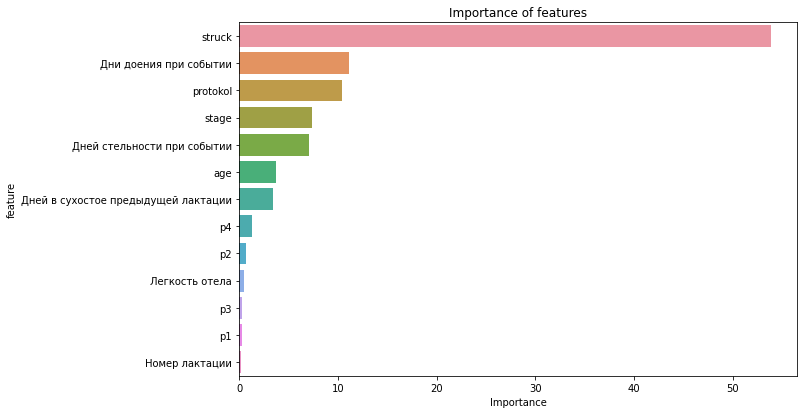

In [56]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (10, len(feature_importances) * 0.5))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
show_feature_importances(X_train.columns, model.feature_importances_)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70       914
           1       0.58      0.24      0.34       503
           2       0.56      0.20      0.29       175
           3       0.52      0.48      0.50        33
           4       0.45      0.39      0.42        49

    accuracy                           0.58      1674
   macro avg       0.54      0.43      0.45      1674
weighted avg       0.58      0.58      0.54      1674



In [58]:
from catboost import Pool
import shap

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(Pool(X_test, y_test, cat_features = category))

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [59]:
list(zip(X_test.columns, model.feature_importances_))

[('Номер лактации', 0.22898882965577028),
 ('Легкость отела', 0.4532178726349438),
 ('Дней в сухостое предыдущей лактации', 3.376935999126811),
 ('Дней стельности при событии', 7.088972965092245),
 ('Дни доения при событии', 11.122375677891231),
 ('protokol', 10.402773945181663),
 ('age', 3.706666616856945),
 ('p1', 0.2469128468810428),
 ('p2', 0.6761152796435894),
 ('p3', 0.2790652984485817),
 ('p4', 1.269153512925897),
 ('struck', 53.81230910610945),
 ('stage', 7.336512049551816)]

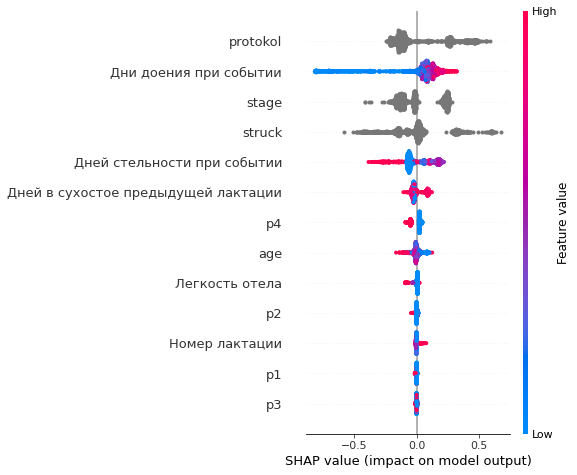

In [60]:
shap.summary_plot(shap_values[0], X_test)

In [62]:
df_cow_model.iloc[1142]

Номер лактации                            4
Легкость отела                            1
Дней в сухостое предыдущей лактации      47
Дней стельности при событии             216
Дни доения при событии                  127
protokol                                КМ5
age                                    1927
p1                                        1
p2                                        0
p3                                        0
p4                                        0
struck                                    1
result                                    3
stage                                     1
Name: 1142, dtype: object